# Zomato Restaurant

# Project Description

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.


Data Storage:

This problem statement contains two datasets- 

Zomato.csv and country_code.csv.

Country_code.csv contains two variables:

• Country code

• Country name


The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:
art working on this project.


• Restaurant Id: Unique id of every restaurant across various cities of the world



• Restaurant Name: Name of the restaurant



• Country Code: Country in which restaurant is located



• City: City in which restaurant is located


• Address: Address of the restaurant


• Locality: Location in the city


• Locality Verbose: Detailed description of the locality


• Longitude: Longitude coordinate of the restaurant&#39;s location


• Latitude: Latitude coordinate of the restaurant&#39;s location


• Cuisines: Cuisines offered by the restaurant


• Average Cost for two: Cost for two people in different currencies


• Currency: Currency of the country


• Has Table booking: yes/no



• Has Online delivery: yes/ no



• Is delivering: yes/ no


• Switch to order menu: yes/no


• Price range: range of price of food


• Aggregate Rating: Average rating out of 5


• Rating color: depending upon the average rating color


• Rating text: text on the basis of rating of rating


• Votes: Number of ratings casted by people


Problem statement : In this dataset predict 2 things –

1) Average Cost for two
               
2) Price range


Hint : Use pandas methods to combine all the datasets and then start working on this project.


Dataset Link-  

•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Z_Restaurant/Country-Code.xlsx

•	https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Z_Restaurant/zomato.csv


In [1]:
# importing necessory libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import  matplotlib.pyplot  as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report


In [2]:
# Extract the dataset from local system

df1 = pd.read_excel(r'C:\Assignements & HW\Internship\project1\Evaluation Phase\Third phase/Country-Code.xlsx')

In [3]:
df1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [4]:
import pandas as pd
df2 = pd.read_csv(r"C:\Assignements & HW\Internship\project1\Evaluation Phase\Third phase/zomato.csv", encoding='ISO-8859-1')
df2

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [5]:
# merge both the data set

df = pd.merge(df2,df1, on='Country Code')

In [6]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


In [7]:
# check the data set shape
df.shape

(9551, 22)

In [8]:
# check the information of data set

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [9]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [10]:
df.columns.tolist()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes',
 'Country']

In [11]:
# delete the null values
df=df.dropna()

In [12]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu 

In [14]:
# check the unique values in the dataset columnwise

df.nunique().to_frame(" Number of unique value ")

,Number of unique value
Restaurant ID,9542
Restaurant Name,7437
Country Code,15
City,140
Address,8910
Locality,1206
Locality Verbose,1263
Longitude,8111
Latitude,8668
Cuisines,1825


In [15]:
# Seperating Numerical and Categorical columns

#Checking for Categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical column ", categorical_col)
print("\n")

#Checking for Numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical column ", numerical_col)

Categorical column  ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']


Numerical column  ['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


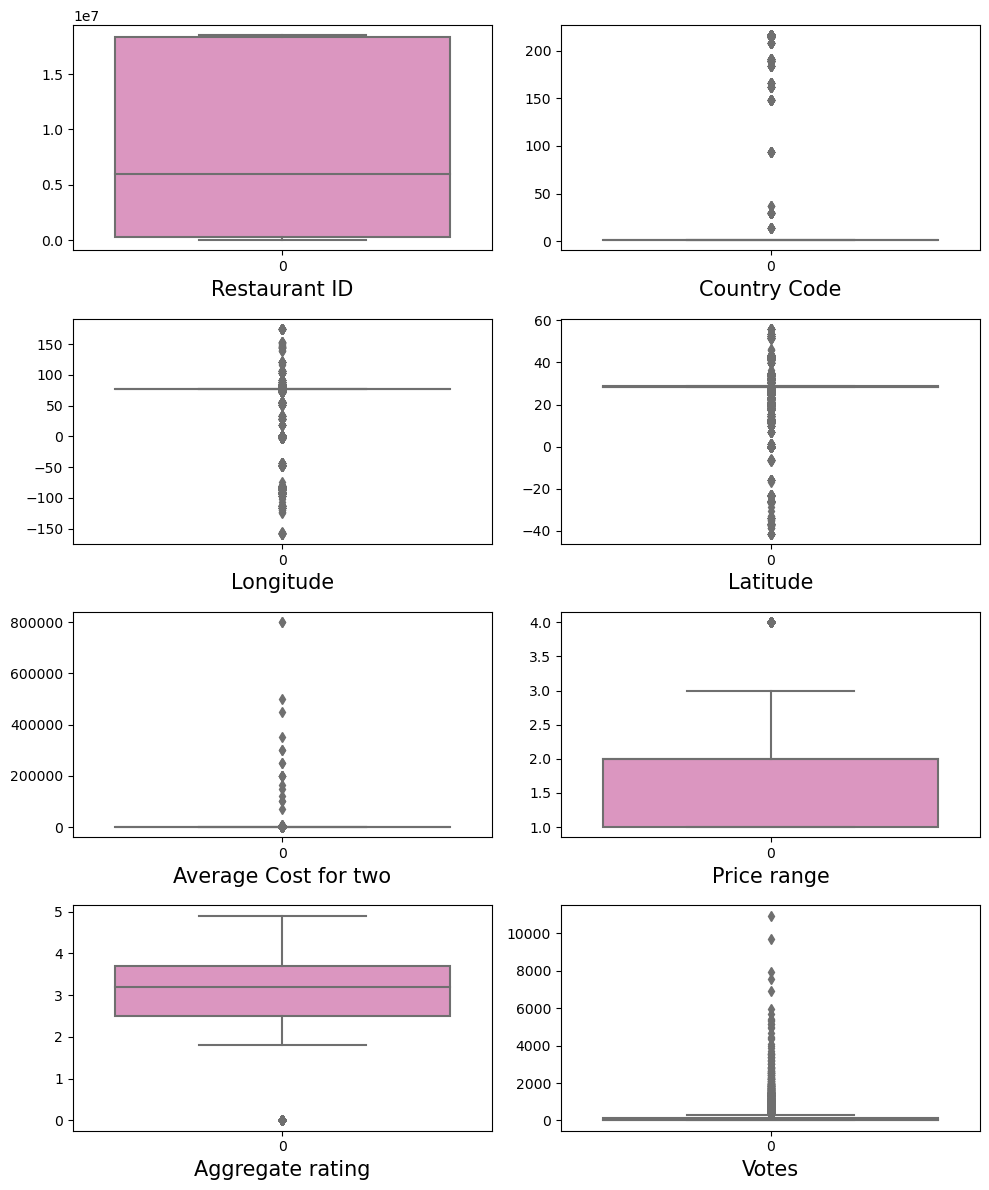

In [16]:
# let’s check the outliers by ploting  boxplot.
plt.figure(figsize = (10, 12),  facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber <=8:
        ax = plt.subplot(4,2,plotnumber)
        sns.boxplot(df[col],palette="Set2_r")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber +=1
plt.tight_layout()
        

In [17]:
df['Price range'].unique()

array([3, 4, 2, 1], dtype=int64)

1    4438
2    3113
3    1405
4     586
Name: Price range, dtype: int64


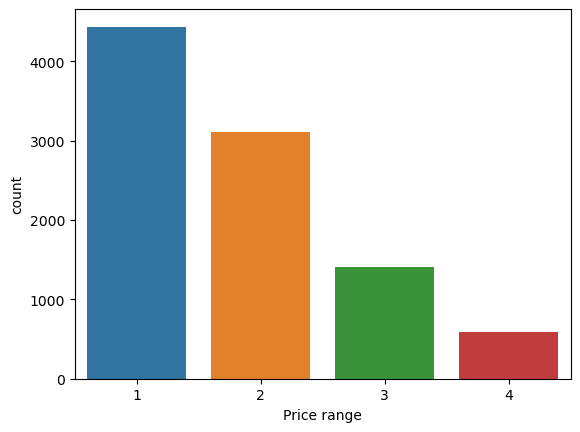

In [18]:
# check Price range using countplot
ax = sns.countplot(x='Price range', data=df)
print(df['Price range'].value_counts())

Indian Rupees(Rs.)        8652
Dollar($)                  473
Pounds(£)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64


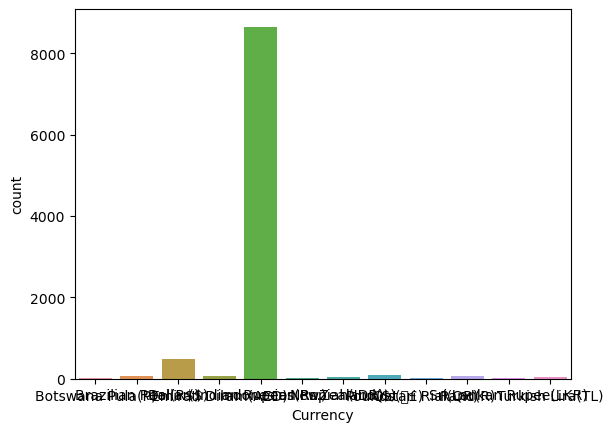

In [19]:
# check   Currency using countplot
ax = sns.countplot(x='Currency', data=df)
print(df['Currency'].value_counts())



No     8384
Yes    1158
Name: Has Table booking, dtype: int64


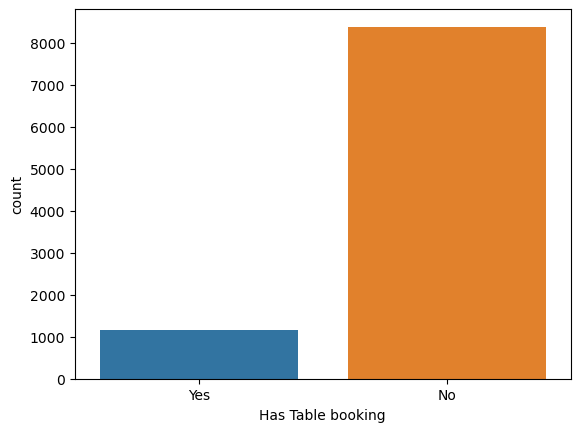

In [20]:
# check Has Table booking using countplot
ax = sns.countplot(x='Has Table booking', data=df)
print(df['Has Table booking'].value_counts())

No     7091
Yes    2451
Name: Has Online delivery, dtype: int64


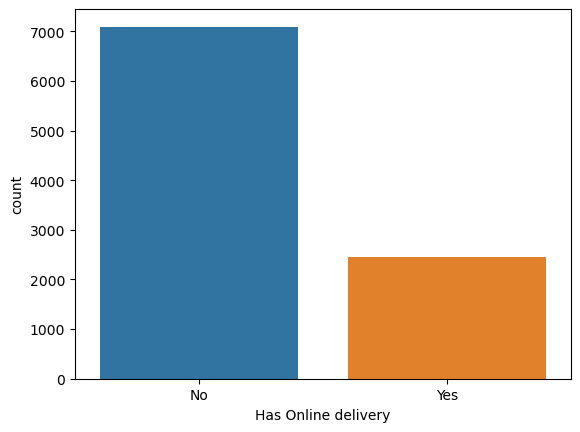

In [21]:
# check  Has Online delivery using countplot
ax = sns.countplot(x='Has Online delivery', data=df)
print(df['Has Online delivery'].value_counts())

No     9508
Yes      34
Name: Is delivering now, dtype: int64


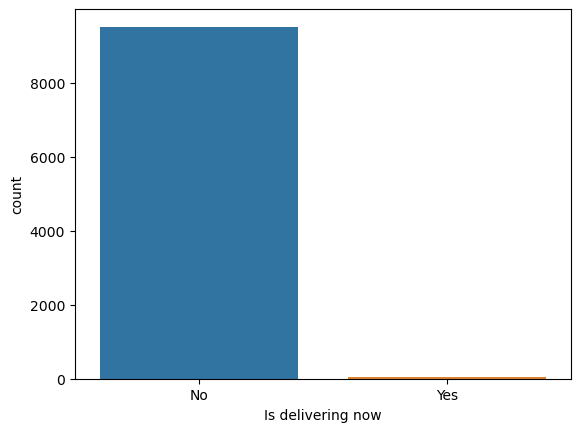

In [22]:
# check  Is delivering now using countplot
ax = sns.countplot(x='Is delivering now', data=df)
print(df['Is delivering now'].value_counts())

Orange        3734
White         2148
Yellow        2096
Green         1078
Dark Green     300
Red            186
Name: Rating color, dtype: int64


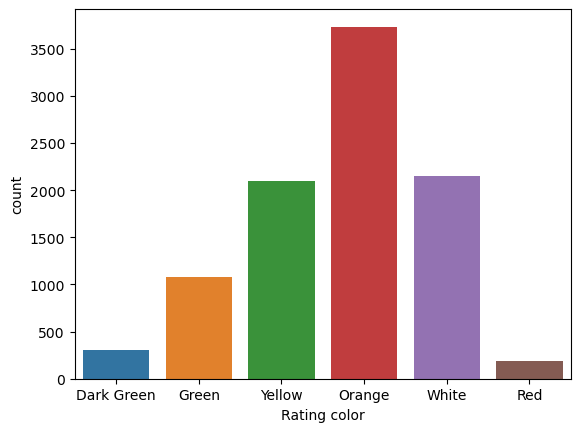

In [23]:
# check Rating color using countplot
ax = sns.countplot(x='Rating color', data=df)
print(df['Rating color'].value_counts())

Average      3734
Not rated    2148
Good         2096
Very Good    1078
Excellent     300
Poor          186
Name: Rating text, dtype: int64


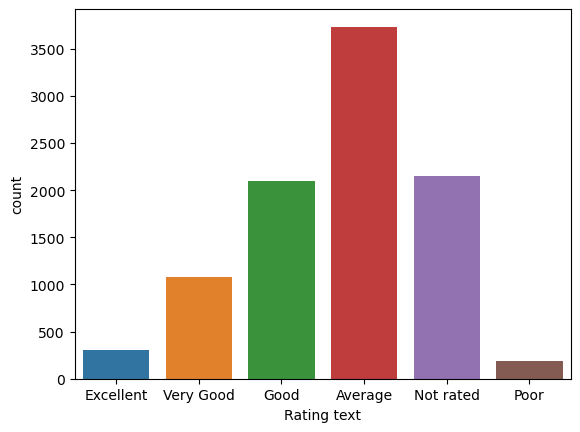

In [24]:
# check  Rating text using countplot
ax = sns.countplot(x='Rating text', data=df)
print(df['Rating text'].value_counts())

India             8652
United States      425
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64


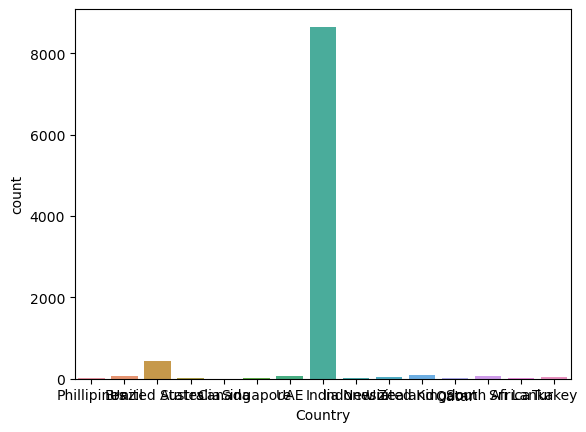

In [25]:
# check  Country using countplot
ax = sns.countplot(x='Country', data=df)
print(df['Country'].value_counts())

In [26]:
# get the categorical column in a variable

categorical_cols = [feature for feature in df.columns if df[feature].dtype=='object']
df[categorical_cols].sample(5)

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text,Country
7414,Ram Ram Ji Kachori Bhandar,New Delhi,"WZ 10, Tihar Village, Main Road, Subhash Nagar...",Subhash Nagar,"Subhash Nagar, New Delhi",Street Food,Indian Rupees(Rs.),No,No,No,No,White,Not rated,India
740,Flechazo,Bangalore,"9/1, 1st Floor, Above Surya Nissan, VRR Orchid...",Marathahalli,"Marathahalli, Bangalore","Asian, Mediterranean, North Indian",Indian Rupees(Rs.),Yes,No,No,No,Green,Very Good,India
5414,Kitchen Namaste,New Delhi,"Khatana Market, Near Sultanpur Metro Station, ...",MG Road,"MG Road, New Delhi","North Indian, Chinese",Indian Rupees(Rs.),No,No,No,No,White,Not rated,India
3059,Open House Cafe,New Delhi,"C-37, Connaught Place, New Delhi",Connaught Place,"Connaught Place, New Delhi","North Indian, Chinese, Mughlai, Italian",Indian Rupees(Rs.),No,No,No,No,Yellow,Good,India
173,The Hamburg Inn No. 2 Inc.,Cedar Rapids/Iowa City,"214 N Linn St, Iowa City, IA 52245",Iowa City,"Iowa City, Cedar Rapids/Iowa City","American, Breakfast, Burger",Dollar($),No,No,No,No,Dark Green,Excellent,United States


In [27]:
# Encoding categorical columns using ordinal encoder columns like policy_state, policy_csl ,insured_sex etc.
#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,3743.0,162,73.0,8677.0,171.0,172.0,121.027535,14.565443,920.0,...,1.0,0.0,0.0,0.0,3,4.8,0.0,1.0,314,6.0
1,6304287,3168.0,162,73.0,6047.0,592.0,600.0,121.014101,14.553708,1111.0,...,1.0,0.0,0.0,0.0,3,4.5,0.0,1.0,591,6.0
2,6300002,2893.0,162,75.0,4676.0,308.0,314.0,121.056831,14.581404,1671.0,...,1.0,0.0,0.0,0.0,4,4.4,1.0,5.0,270,6.0
3,6318506,4700.0,162,75.0,8682.0,860.0,873.0,121.056475,14.585318,1126.0,...,0.0,0.0,0.0,0.0,4,4.9,0.0,1.0,365,6.0
4,6314302,5515.0,162,75.0,8681.0,860.0,873.0,121.057508,14.584450,1122.0,...,1.0,0.0,0.0,0.0,4,4.8,0.0,1.0,229,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4436.0,208,139.0,5918.0,516.0,522.0,28.977392,41.022793,1813.0,...,0.0,0.0,0.0,0.0,3,4.1,1.0,5.0,788,11.0
9547,5908749,1311.0,208,139.0,5954.0,551.0,557.0,29.041297,41.009847,1824.0,...,0.0,0.0,0.0,0.0,3,4.2,1.0,5.0,1034,11.0
9548,5915807,3064.0,208,139.0,5958.0,553.0,560.0,29.034640,41.055817,1110.0,...,0.0,0.0,0.0,0.0,4,3.7,5.0,2.0,661,11.0
9549,5916112,513.0,208,139.0,5959.0,553.0,560.0,29.036019,41.057979,1657.0,...,0.0,0.0,0.0,0.0,4,4.0,1.0,5.0,901,11.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   float64
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   float64
 4   Address               9542 non-null   float64
 5   Locality              9542 non-null   float64
 6   Locality Verbose      9542 non-null   float64
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   float64
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   float64
 12  Has Table booking     9542 non-null   float64
 13  Has Online delivery   9542 non-null   float64
 14  Is delivering now     9542 non-null   float64
 15  Switch to order menu 

In [29]:
# Remove the 1ncident_location coulmn from the dataset

df = df.drop('Switch to order menu', axis=1) 

In [30]:
df.describe()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,...,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,3648.654265,18.179208,77.570530,4538.486166,657.080277,676.259694,64.274997,25.848532,989.163173,...,3.979564,0.121358,0.256864,0.003563,1.804968,2.665238,2.952840,1.788933,156.772060,3.727101
std,8.791967e+06,2140.178731,56.451600,22.781307,2563.438975,314.889244,330.752100,41.197602,11.010094,514.326600,...,0.912652,0.326560,0.436927,0.059589,0.905563,1.516588,1.492629,1.694795,430.203324,2.634405
min,5.300000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-157.948486,-41.330428,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.019312e+05,1775.250000,1.000000,78.250000,2321.250000,381.000000,387.000000,77.081565,28.478658,497.000000,...,4.000000,0.000000,0.000000,0.000000,1.000000,2.500000,2.000000,0.000000,5.000000,3.000000
50%,6.002726e+06,3590.500000,1.000000,87.000000,4606.500000,694.000000,705.000000,77.192031,28.570444,1126.000000,...,4.000000,0.000000,0.000000,0.000000,2.000000,3.200000,2.000000,2.000000,31.000000,3.000000
75%,1.835260e+07,5478.750000,1.000000,87.000000,6740.750000,919.000000,951.000000,77.282043,28.642711,1354.000000,...,4.000000,0.000000,1.000000,0.000000,2.000000,3.700000,4.000000,3.000000,130.000000,3.000000
max,1.850065e+07,7436.000000,216.000000,139.000000,8909.000000,1205.000000,1262.000000,174.832089,55.976980,1824.000000,...,11.000000,1.000000,1.000000,1.000000,4.000000,4.900000,5.000000,5.000000,10934.000000,14.000000


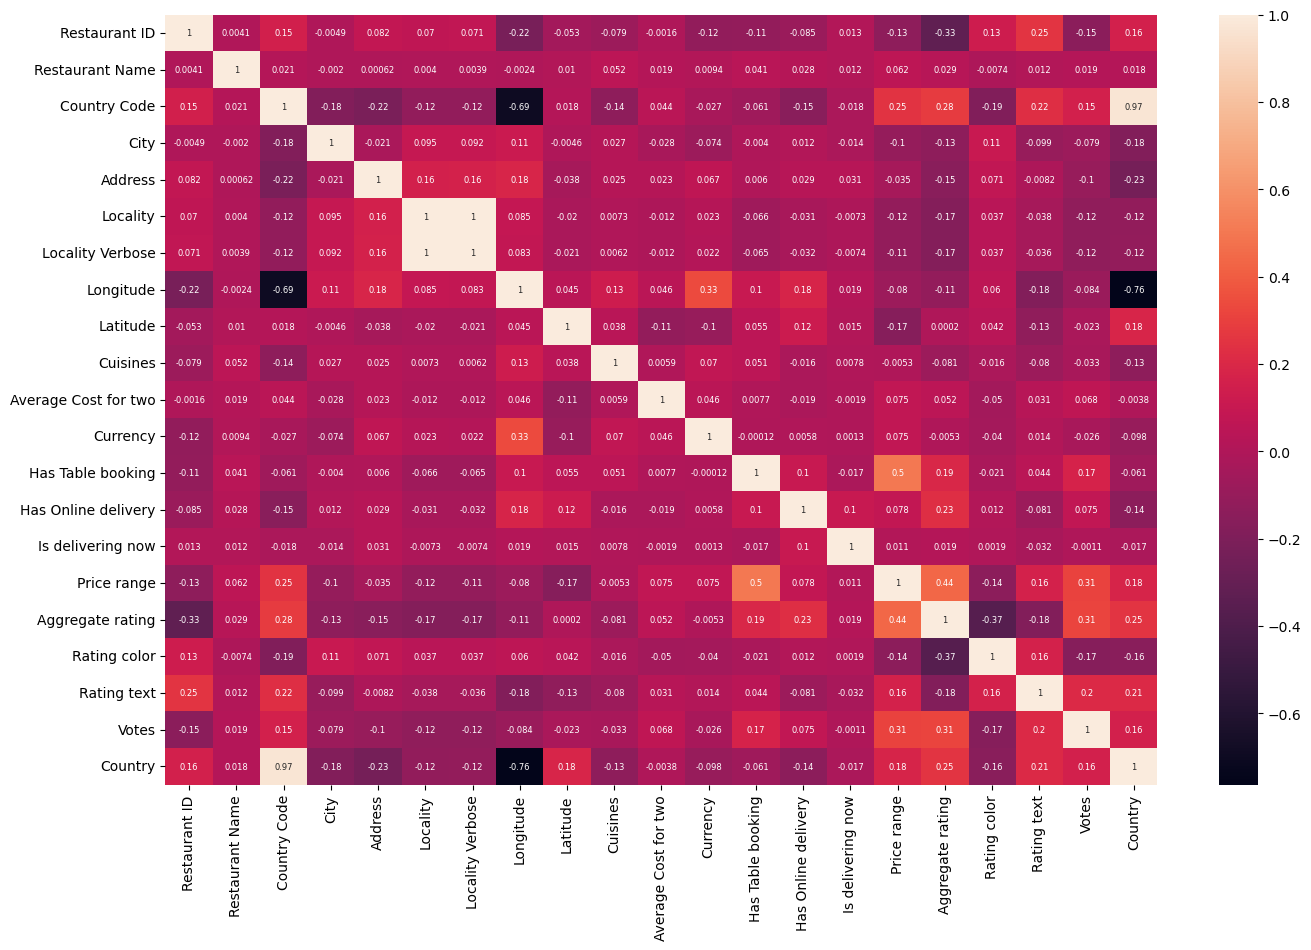

In [31]:
# Plotting Heatmap (Correlation matrix)
df_corr = df.corr() 

plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, annot_kws={'size':6})
plt.show()

In [32]:
# check the skewness of data
df.skew()

Restaurant ID            0.063496
Restaurant Name          0.044859
Country Code             3.064922
City                    -1.191599
Address                 -0.040534
Locality                -0.253110
Locality Verbose        -0.182343
Longitude               -2.819828
Latitude                -3.081780
Cuisines                -0.305923
Average Cost for two    35.461264
Currency                 2.879234
Has Table booking        2.319457
Has Online delivery      1.113168
Is delivering now       16.665472
Price range              0.889879
Aggregate rating        -0.953052
Rating color             0.046227
Rating text              0.430970
Votes                    8.813270
Country                  3.337828
dtype: float64

In [33]:
# reduce the skewness

df['Country Code']=np.cbrt(df['Country Code'])
df['Average Cost for two']=np.cbrt(df['Average Cost for two'])
df['Is delivering now']=np.cbrt(df['Is delivering now'])
df['Votes']=np.cbrt(df['Votes'])

In [34]:
df.skew()

Restaurant ID            0.063496
Restaurant Name          0.044859
Country Code             2.943058
City                    -1.191599
Address                 -0.040534
Locality                -0.253110
Locality Verbose        -0.182343
Longitude               -2.819828
Latitude                -3.081780
Cuisines                -0.305923
Average Cost for two     9.661970
Currency                 2.879234
Has Table booking        2.319457
Has Online delivery      1.113168
Is delivering now       16.665472
Price range              0.889879
Aggregate rating        -0.953052
Rating color             0.046227
Rating text              0.430970
Votes                    1.206261
Country                  3.337828
dtype: float64

In [35]:
df['Is delivering now']=np.cbrt(df['Is delivering now'])

In [36]:
df.skew()

Restaurant ID            0.063496
Restaurant Name          0.044859
Country Code             2.943058
City                    -1.191599
Address                 -0.040534
Locality                -0.253110
Locality Verbose        -0.182343
Longitude               -2.819828
Latitude                -3.081780
Cuisines                -0.305923
Average Cost for two     9.661970
Currency                 2.879234
Has Table booking        2.319457
Has Online delivery      1.113168
Is delivering now       16.665472
Price range              0.889879
Aggregate rating        -0.953052
Rating color             0.046227
Rating text              0.430970
Votes                    1.206261
Country                  3.337828
dtype: float64

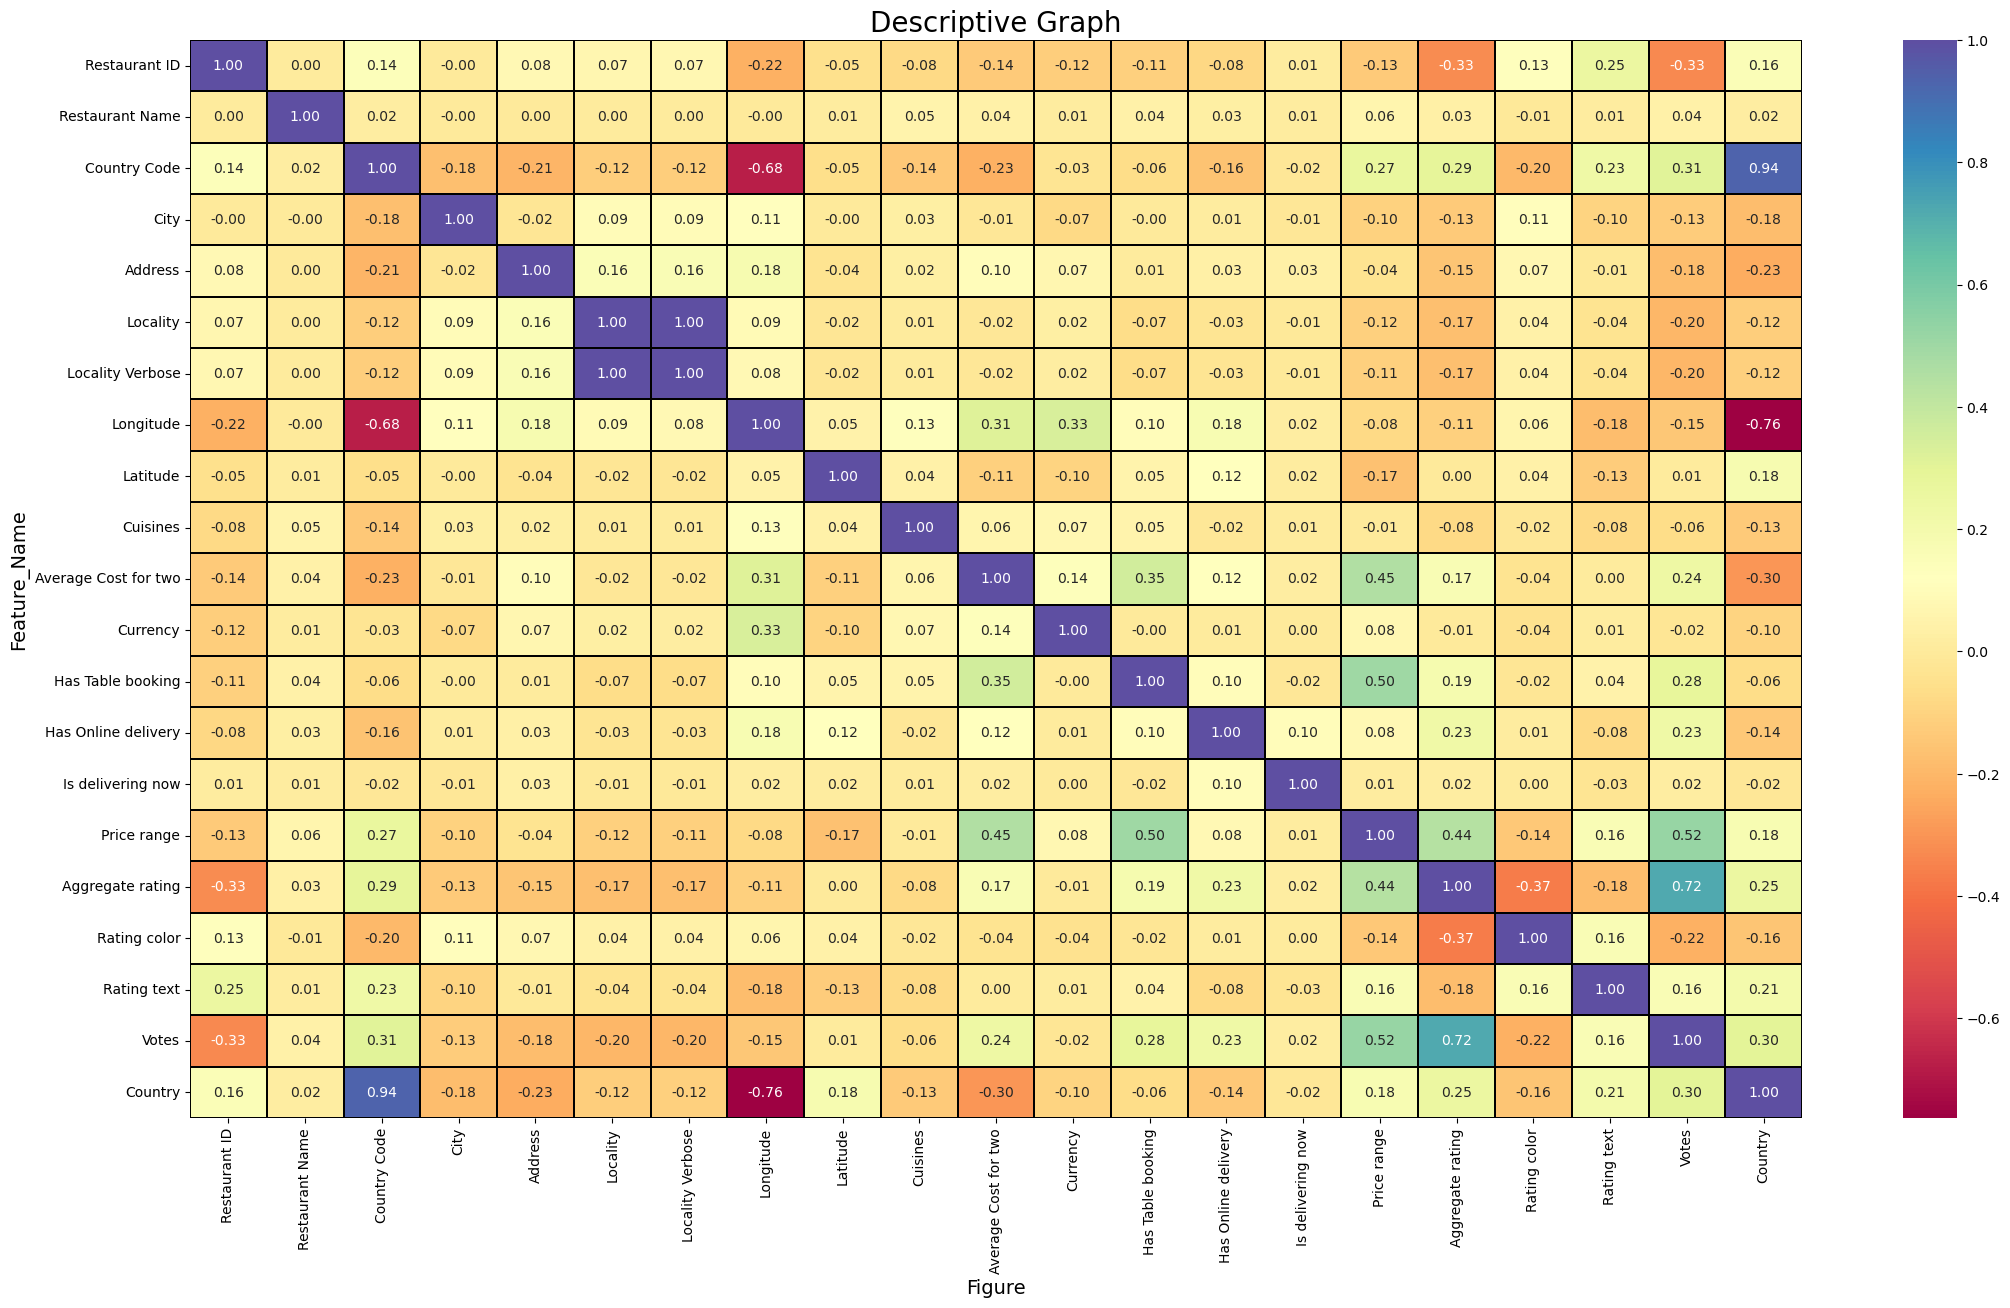

In [37]:
# Draw correlation using heatmap

plt.figure(figsize=(26,14))
sns.heatmap(df.corr(), annot=True, fmt='0.2f',linewidth=0.2, linecolor='black', cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Feature_Name', fontsize=14)
plt.title('Descriptive Graph', fontsize=20)
plt.show()

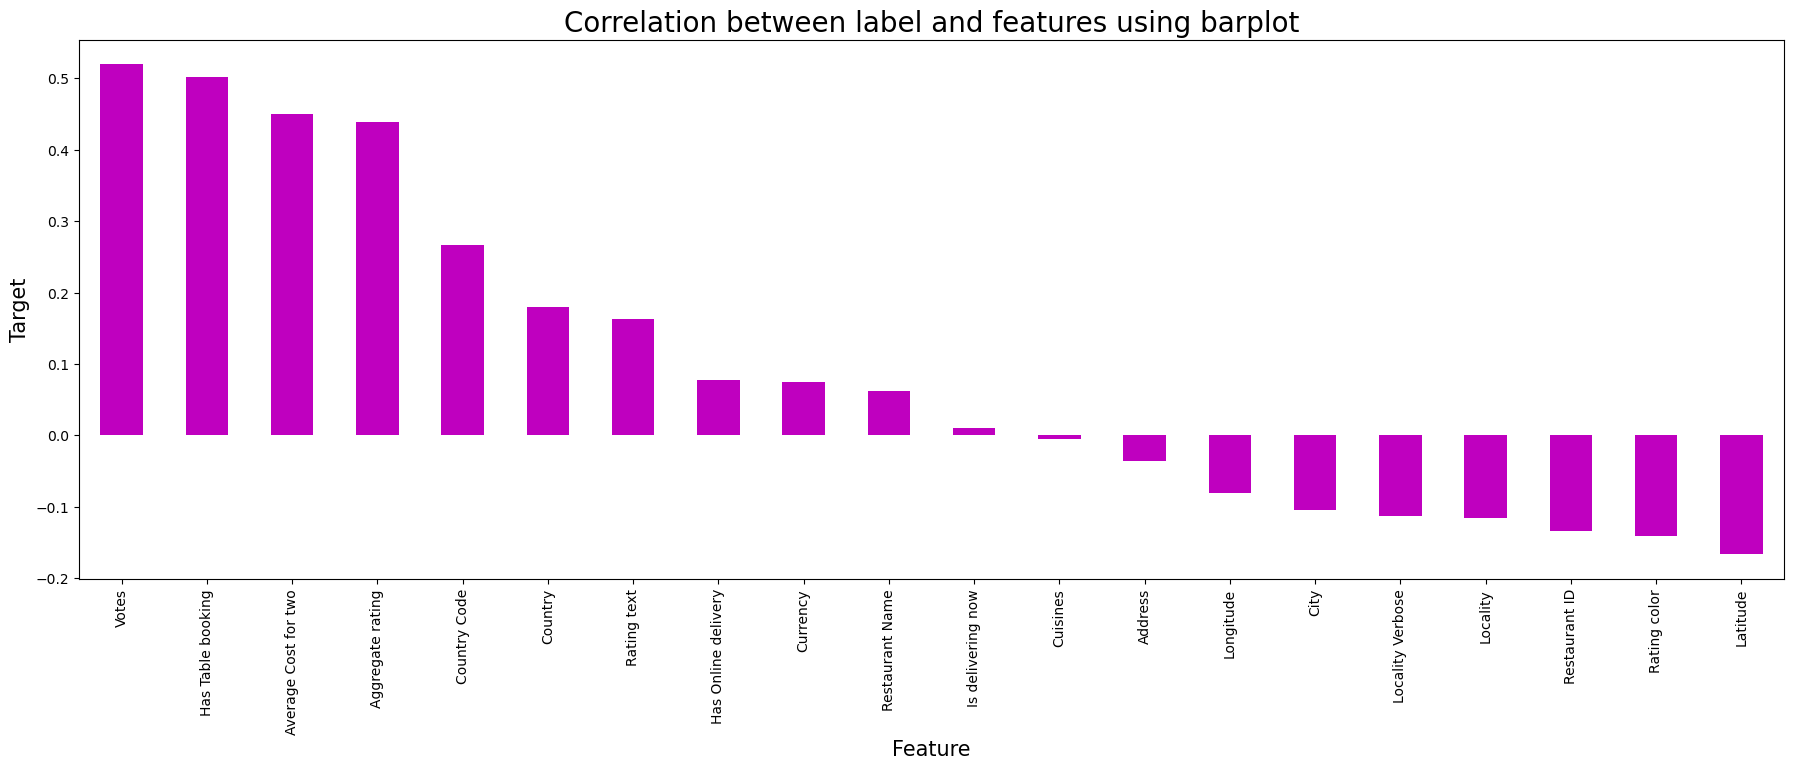

In [38]:
# correlation betweeb label and features using barplot
plt.figure(figsize=(22,7))
df.corr()['Price range'].sort_values(ascending=False).drop(['Price range']).plot(kind='bar', color="m")
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title("Correlation between label and features using barplot", fontsize = 20)
plt.show()


# Seperate the features and label

In [39]:
x = df.drop("Price range",axis = 1)
y = df["Price range"]


In [40]:
y.value_counts()

1    4438
2    3113
3    1405
4     586
Name: Price range, dtype: int64

# Taking care of class imbalance

In [41]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x,y=oversample.fit_resample(x,y)

In [42]:
y.value_counts()

3    4438
4    4438
2    4438
1    4438
Name: Price range, dtype: int64

In [43]:
x

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,3743.000000,5.451362,73.000000,8677.000000,171.000000,172.000000,121.027535,14.565443,920.000000,10.322801,0.0,1.000000,0.000000,0.0,4.800000,0.000000,1.000000,6.796884,6.0
1,6304287,3168.000000,5.451362,73.000000,6047.000000,592.000000,600.000000,121.014101,14.553708,1111.000000,10.626586,0.0,1.000000,0.000000,0.0,4.500000,0.000000,1.000000,8.391942,6.0
2,6300002,2893.000000,5.451362,75.000000,4676.000000,308.000000,314.000000,121.056831,14.581404,1671.000000,15.874011,0.0,1.000000,0.000000,0.0,4.400000,1.000000,5.000000,6.463304,6.0
3,6318506,4700.000000,5.451362,75.000000,8682.000000,860.000000,873.000000,121.056475,14.585318,1126.000000,11.447142,0.0,0.000000,0.000000,0.0,4.900000,0.000000,1.000000,7.146569,6.0
4,6314302,5515.000000,5.451362,75.000000,8681.000000,860.000000,873.000000,121.057508,14.584450,1122.000000,11.447142,0.0,1.000000,0.000000,0.0,4.800000,0.000000,1.000000,6.118033,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17747,310472,533.559601,1.000000,87.000000,2347.549877,641.655282,650.746211,77.252827,28.576736,1138.202896,13.572088,4.0,1.000000,0.381814,0.0,3.043633,3.145442,0.763628,4.339146,3.0
17748,6601237,4570.246109,3.107233,21.000000,7381.403790,143.143444,146.920495,-47.917378,-15.827985,1144.595878,5.768091,1.0,0.000000,0.000000,0.0,3.660242,4.801208,1.867472,1.734501,1.0
17749,310673,6688.993383,1.000000,50.591188,8673.520659,1091.600549,1144.600549,77.144101,28.245631,625.000000,14.455844,4.0,0.015978,0.000000,0.0,3.695207,4.952066,1.968044,3.559315,3.0
17750,8387,4054.832590,1.000000,87.892428,5797.139421,486.754974,492.754974,77.507749,28.484093,896.798850,12.599210,4.0,0.994024,0.000000,0.0,3.206574,1.994024,0.029881,2.724677,3.0


# Feature scaling using standard Scalarization

In [44]:
from sklearn.preprocessing import StandardScaler

# Feature scaling using standard Scalarization

In [48]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
X

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes,Country
0,-0.222621,-0.000867,2.226553,-0.138398,1.625986,-1.507036,-1.489314,1.309148,-0.624184,-0.123469,0.308219,-3.121674,1.817810,-0.581808,-0.057752,1.272078,-1.810586,-0.625487,0.768621,0.640271
1,-0.224199,-0.280104,2.226553,-0.138398,0.581955,-0.136530,-0.162713,1.308851,-0.624991,0.281802,0.375602,-3.121674,1.817810,-0.581808,-0.057752,1.046460,-1.810586,-0.625487,1.318320,0.640271
2,-0.224705,-0.413652,2.226553,-0.059458,0.037709,-1.061052,-1.049180,1.309795,-0.623085,1.470033,1.539540,-3.121674,1.817810,-0.581808,-0.057752,0.971254,-1.161996,1.761237,0.653661,0.640271
3,-0.222518,0.463880,2.226553,-0.059458,1.627971,0.735906,0.683460,1.309787,-0.622816,0.313630,0.557610,-3.121674,-0.610453,-0.581808,-0.057752,1.347284,-1.810586,-0.625487,0.889132,0.640271
4,-0.223015,0.859668,2.226553,-0.059458,1.627574,0.735906,0.683460,1.309810,-0.622876,0.305143,0.557610,-3.121674,1.817810,-0.581808,-0.057752,1.272078,-1.810586,-0.625487,0.534671,0.640271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17747,-0.932688,-1.559465,-0.440848,0.414179,-0.886617,0.025116,-0.005424,0.342803,0.339750,0.339523,1.028947,-0.032752,1.817810,0.369639,-0.057752,-0.048817,0.229516,-0.766526,-0.078380,-0.358283
17748,-0.189098,0.400868,0.821875,-2.190826,1.111673,-1.597719,-1.567049,-2.420381,-2.715157,0.353087,-0.702068,-2.349443,-0.610453,-0.581808,-0.057752,0.414911,1.303429,-0.107883,-0.976009,-1.023986
17749,-0.932664,1.429794,-0.440848,-1.022868,1.624605,1.489849,1.525295,0.340403,0.316971,-0.749412,1.224974,-0.032752,-0.571654,-0.581808,-0.057752,0.441206,1.401274,-0.047874,-0.347130,-0.358283
17750,-0.968396,0.150568,-0.440848,0.449403,0.482767,-0.479140,-0.495123,0.348431,0.333376,-0.172698,0.813152,-0.032752,1.803298,-0.581808,-0.057752,0.073725,-0.517282,-1.204339,-0.634768,-0.358283


In [49]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Creating the training and testing data sets

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [51]:
# Checking accuracy for RandomForestClassifier 
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
predRFC = RFC.predict(X_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.9853562376795268
[[892   5   1   0]
 [  4 863  11   2]
 [  0   9 885  16]
 [  0   0   4 859]]
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       898
           2       0.98      0.98      0.98       880
           3       0.98      0.97      0.98       910
           4       0.98      1.00      0.99       863

    accuracy                           0.99      3551
   macro avg       0.99      0.99      0.99      3551
weighted avg       0.99      0.99      0.99      3551



In [52]:
# Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
predLR = LR.predict(X_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.8065333708814418
[[885  12   0   1]
 [ 14 829  21  16]
 [  0  80 554 276]
 [  0   1 266 596]]
              precision    recall  f1-score   support

           1       0.98      0.99      0.98       898
           2       0.90      0.94      0.92       880
           3       0.66      0.61      0.63       910
           4       0.67      0.69      0.68       863

    accuracy                           0.81      3551
   macro avg       0.80      0.81      0.80      3551
weighted avg       0.80      0.81      0.80      3551



In [53]:
# Checking accuracy for support vector machine classifier 
svc = SVC()
svc.fit(X_train, y_train)
predsvc = svc.predict(X_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.9146719234018587
[[828  58  11   1]
 [ 17 791  65   7]
 [  0  49 807  54]
 [  0   7  34 822]]
              precision    recall  f1-score   support

           1       0.98      0.92      0.95       898
           2       0.87      0.90      0.89       880
           3       0.88      0.89      0.88       910
           4       0.93      0.95      0.94       863

    accuracy                           0.91      3551
   macro avg       0.92      0.92      0.92      3551
weighted avg       0.92      0.91      0.91      3551



In [54]:
# Checking accuracy for Gradient Boosting classifier 
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)
predGB = GB.predict(X_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.9690228104759223
[[894   3   1   0]
 [ 11 857   9   3]
 [  0  26 849  35]
 [  0   0  22 841]]
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       898
           2       0.97      0.97      0.97       880
           3       0.96      0.93      0.95       910
           4       0.96      0.97      0.97       863

    accuracy                           0.97      3551
   macro avg       0.97      0.97      0.97      3551
weighted avg       0.97      0.97      0.97      3551



In [55]:
# Checking accuracy for AdaBoost classifier 
ABC = AdaBoostClassifier()
ABC.fit(X_train, y_train)
predABC = ABC.predict(X_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.7274007321881161
[[862  35   1   0]
 [ 22 843  12   3]
 [  0  75 790  45]
 [  0   0 775  88]]
              precision    recall  f1-score   support

           1       0.98      0.96      0.97       898
           2       0.88      0.96      0.92       880
           3       0.50      0.87      0.64       910
           4       0.65      0.10      0.18       863

    accuracy                           0.73      3551
   macro avg       0.75      0.72      0.67      3551
weighted avg       0.75      0.73      0.68      3551



In [56]:
# Checking accuracy for Bagging classifier 
BC = BaggingClassifier()
BC.fit(X_train, y_train)
predBC = BC.predict(X_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))

0.9862010701210927
[[893   5   0   0]
 [  4 869   6   1]
 [  0   5 889  16]
 [  0   0  12 851]]
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       898
           2       0.99      0.99      0.99       880
           3       0.98      0.98      0.98       910
           4       0.98      0.99      0.98       863

    accuracy                           0.99      3551
   macro avg       0.99      0.99      0.99      3551
weighted avg       0.99      0.99      0.99      3551



In [57]:
# Checking accuracy for Extra Tree classifier 
ET = ExtraTreesClassifier()
ET.fit(X_train, y_train)
predET = ET.predict(X_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.9724021402421853
[[882  15   1   0]
 [ 12 838  27   3]
 [  0  13 879  18]
 [  0   0   9 854]]
              precision    recall  f1-score   support

           1       0.99      0.98      0.98       898
           2       0.97      0.95      0.96       880
           3       0.96      0.97      0.96       910
           4       0.98      0.99      0.98       863

    accuracy                           0.97      3551
   macro avg       0.97      0.97      0.97      3551
weighted avg       0.97      0.97      0.97      3551



In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

# Machine Learning Model for Classification and Evaluation Metrics

In [59]:
def metric_score(clf, X_train,X_test,y_train,y_test, train = True):
    if train:
        y_pred = clf.predict(X_train)
        
        print("\n===============Train Result =============================")
        
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
        
    elif train==False :
        pred = clf.predict(X_test)
        
        print("\n===============Test Result =============================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
                        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits = 2)) ## model confidance/accuracy
        

In [60]:


RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
# Call the function and pass dataset to check train and test score 
metric_score(RFC,X_train,X_test,y_train,y_test,train=True)  #This is for training score 

metric_score(RFC,X_train,X_test,y_train,y_test,train=False) # This is for testing score


===============Train Result =============================
Accuracy Score: 100.00%

===============Test Result =============================
Accuracy Score: 98.78%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       1.00      0.99      0.99      1358
           2       0.98      0.99      0.98      1336
           3       0.98      0.98      0.98      1290
           4       0.98      1.00      0.99      1342

    accuracy                           0.99      5326
   macro avg       0.99      0.99      0.99      5326
weighted avg       0.99      0.99      0.99      5326



# Save the model

In [62]:
# Saving the model using .pkl

import joblib
joblib.dump(RFC, "zomato_price_range.pkl")

['zomato_price_range.pkl']

# Predict the save model

In [64]:
# Let's load the saved model and get the prediction 

model = joblib.load("zomato_price_range.pkl")

# Prediction 

prediction = model.predict(X_test)
prediction

array([1, 1, 2, ..., 2, 2, 4], dtype=int64)

# Actual v/s prediction

In [65]:
a = np.array(y_test)
data = pd.DataFrame()
data["Predicted"]=prediction
data["Original"]=a
data

,Predicted,Original
0,1,1
1,1,1
2,2,2
3,2,2
4,4,4
...,...,...
5321,1,1
5322,4,4
5323,2,2
5324,2,2
